## 자동차 연비 데이터셋

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/auto+mpg)에서 다운로드
 
 
- [Kaggle](https://www.kaggle.com/)의
[Auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset)에서 다운로드

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. 데이터 탐색

#### 1.1 데이터 적재

In [154]:
df = pd.read_csv('./Datasets/auto-mpg.csv', header = None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


#### 1.2 데이터 일부 확인

0. mpg: continuous
1. cylinders: multi-valued discrete
2. displacement: continuous
3. horsepower: continuous
4. weight: continuous
5. acceleration: continuous
6. model year: multi-valued discrete
7. origin: multi-valued discrete
8. car name: string (unique for each instance)

In [84]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### 1.3 열 이름 지정

* 예 : ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

In [85]:
df.rename(columns = {0:'mpg', 1:'cylinders', 2:'displacement', 3:'horsepower', 4:'weight', 5:'acceleration',
                     6:'model year', 7:'origin', 8:'name'}, inplace = True)

In [155]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

- mpg : 연비
- cylinders : 실린더수 
- displacement : 배기량
- horsepower: 출력
- weight : 차중
- acceleration : 가속능력
- model year : 출시년도
- origin : 제조국 1(USA), 2(EU), 3(JPN)
- name : 모델명

#### 1.4 데이터 형상 확인

In [87]:
df.shape

(398, 9)

#### 1.5 데이터 요약정보 확인(데이터 타입, 누락정보)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### 1.6 데이터 자료형 확인 

In [90]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object

#### 1.7 Series(horsepower 열)의 자료형 확인 

In [91]:
df['horsepower'].dtype

dtype('O')

In [92]:
df['horsepower'].value_counts()

150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: horsepower, Length: 94, dtype: int64

In [94]:
df['horsepower'].value_counts().index

Index(['150.0', '90.00', '88.00', '110.0', '100.0', '75.00', '95.00', '105.0',
       '70.00', '67.00', '65.00', '97.00', '85.00', '80.00', '145.0', '140.0',
       '92.00', '68.00', '78.00', '84.00', '?', '72.00', '180.0', '71.00',
       '86.00', '115.0', '130.0', '60.00', '170.0', '175.0', '83.00', '120.0',
       '76.00', '165.0', '52.00', '190.0', '125.0', '215.0', '48.00', '63.00',
       '112.0', '225.0', '96.00', '69.00', '74.00', '129.0', '98.00', '198.0',
       '53.00', '81.00', '79.00', '153.0', '58.00', '62.00', '87.00', '46.00',
       '160.0', '155.0', '139.0', '66.00', '149.0', '132.0', '64.00', '116.0',
       '77.00', '89.00', '142.0', '135.0', '138.0', '133.0', '103.0', '107.0',
       '108.0', '102.0', '220.0', '113.0', '200.0', '210.0', '193.0', '54.00',
       '208.0', '137.0', '158.0', '167.0', '94.00', '230.0', '49.00', '91.00',
       '122.0', '61.00', '93.00', '148.0', '152.0', '82.00'],
      dtype='object')

In [96]:
df['horsepower'].isin(['?']).sum()

6

* (Question) horsepower는 숫자 데이터인데 왜 object 형으로 반환되었을까?
* (Answer) 중간에 6개의 '?'로 인해 object 형으로 반환되었다.

#### 1.8 제조국(origin) 특성의 데이터 분포(건수) 확인하기
- 1(USA), 2(EU), 3(JPN)

In [98]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [99]:
df['origin'].nunique()

3

In [97]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [46]:
df.value_counts('origin')

origin
1    249
3     79
2     70
dtype: int64

#### 1.9 제조국(origin) 특성을 histogram으로 표현하기

<AxesSubplot:ylabel='Frequency'>

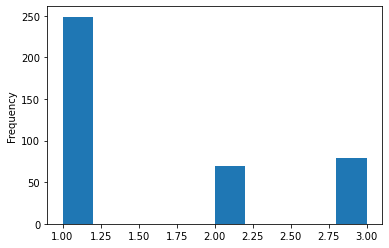

In [101]:
df['origin'].plot(kind = 'hist')

<AxesSubplot:>

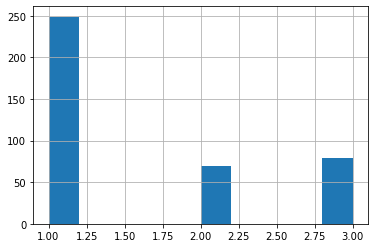

In [102]:
df['origin'].hist()

#### 1.10 coutry 컬럼 추가하기
* 제조국 1, 2, 3을 각각 "USA", "Europe", "Japan"으로 대체한 값을 새로운 컬럼(country)에 적용하기

In [103]:
df['origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: origin, Length: 398, dtype: object

In [107]:
df['country'] = df['origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,country
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,USA
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,Europe
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,USA
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,USA


* coutry 특성으로 groupby하여 "국가당 몇건"의 샘플이 있는지 확인하기

In [110]:
df.groupby('country').size()

country
Europe     70
Japan      79
USA       249
dtype: int64

In [111]:
df['country'].value_counts()

USA       249
Japan      79
Europe     70
Name: country, dtype: int64

- 위에서 구한 국가당 레코드수를 파이차트 그리기

In [113]:
country = df.groupby('country').size()
type(country)

pandas.core.series.Series

<AxesSubplot:ylabel='None'>

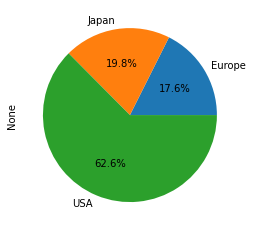

In [117]:
country.plot(kind = 'pie', autopct = '%.1f%%')

#### 1.11 국가별(country) mpg 값의 분포를 boxplot으로 확인하기
- (Question) mpg의 중간값이 가장 낮은 국가는?
- (Answer) USA

In [118]:
df['mpg'].median() # 전체 398건에 대한 연비 중앙값

23.0

<AxesSubplot:>

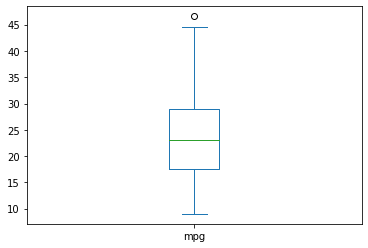

In [120]:
df['mpg'].plot(kind = 'box')

In [121]:
# (참고) seaborn 모듈에서 범주형 데이터 값에 따른 수치형 데이터 값이 어떠한지 나타내는 그래프
# 막대 그래프(barplot)
# 박스 플롯(boxplot)
# 포인트 플롯(pointplot)

# 제조국(범주형 데이터)에 따른 연비(수치형)를 확인

<AxesSubplot:xlabel='country', ylabel='mpg'>

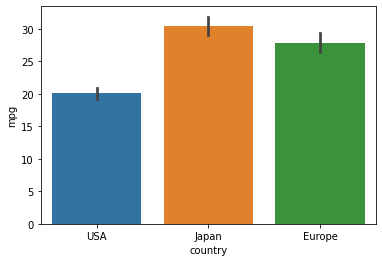

In [122]:
sns.barplot(data = df, x = 'country', y = 'mpg')

<AxesSubplot:xlabel='country', ylabel='mpg'>

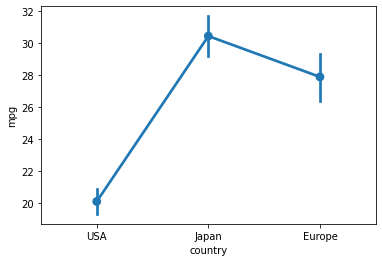

In [123]:
sns.pointplot(data = df, x = 'country', y = 'mpg')

<AxesSubplot:xlabel='country', ylabel='mpg'>

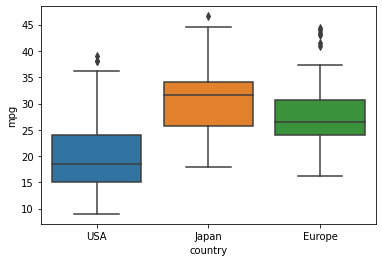

In [124]:
sns.boxplot(data = df, x = 'country', y = 'mpg')

In [126]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

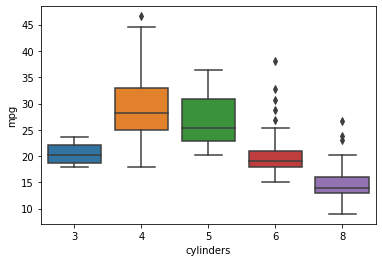

In [127]:
sns.boxplot(data = df, x = 'cylinders', y = 'mpg')

#### 1.12 통계 정보 확인 

In [144]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.142857,-0.142857,-0.142857,-0.142857,0.142857,0.142857,0.142857
std,1.069045,1.069045,1.069045,1.069045,1.069045,1.069045,1.069045
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.13 특성들 간의 상관관계 구하기 

- 상관계수 매트릭스 : df.corr() 이용

In [146]:
df.corr()  # 범주형 데이터에서는 크게 의미가 없다.

,0,1,2,4,5,6,7
0,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
1,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
2,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
4,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
5,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
6,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
7,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


- (시각화 1) 상관계수 산점도로 시각화 하기 : pd.plotting.scatter_matrix()

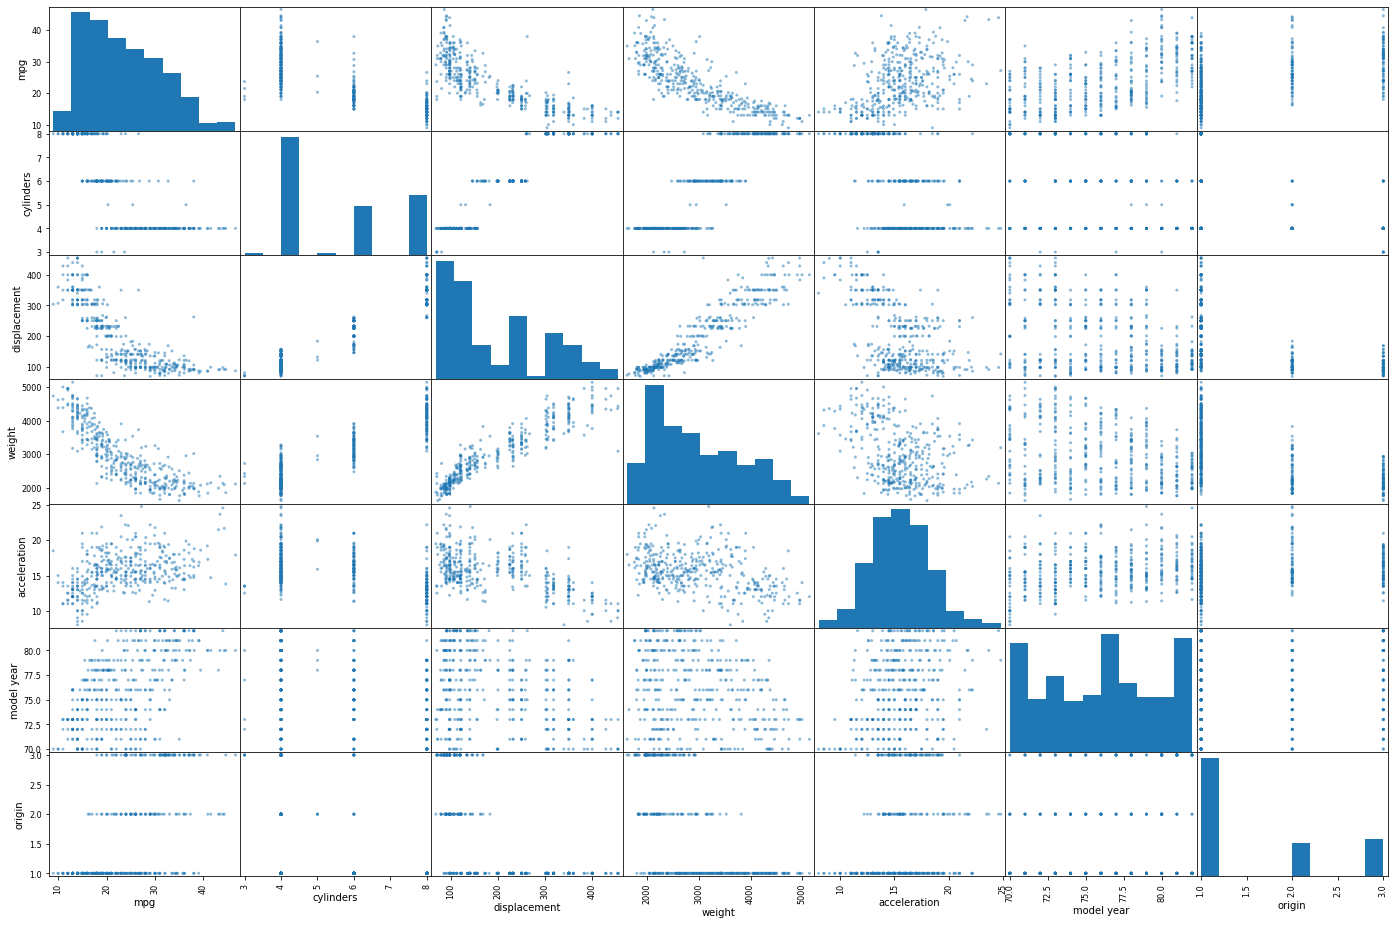

In [130]:
obj = pd.plotting.scatter_matrix(df, figsize = (24, 16))

- (시각화 2) 상관계수 히트맵으로 시각화하기

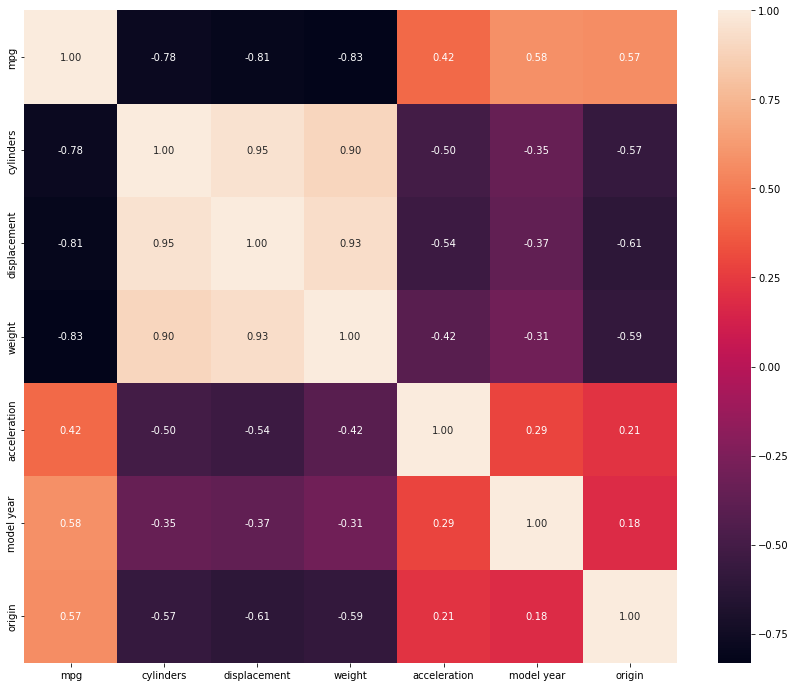

In [196]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df_corr, annot=True, fmt = '.2f', square=True);

* (Question) 타깃(mpg)와의 상관계수가 가장 높은 특성은?
* (Answer) weight가 mpg와 음의 상관관계가 높다.

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

- weight 특성과, mpg(타깃) 의 상관관계 및 산점도

In [156]:
df[['weight', 'mpg']].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


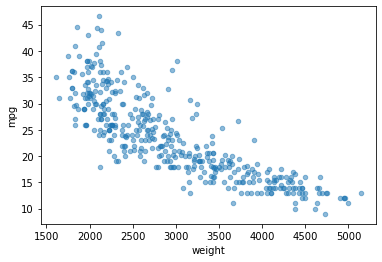

In [157]:
d = df.plot(kind = 'scatter', x = 'weight', y = 'mpg', alpha = 0.5)

## 2. 데이터 처리

### 2.1 누락데이터 처리하기

- horsepower 열의 ('?')를 np.nan으로 변경

In [158]:
df['horsepower'].isin(['?']).sum()

6

In [159]:
df['horsepower'].replace('?', np.nan, inplace = True)

In [160]:
df['horsepower'].isin(['?']).sum()

0

In [162]:
df['horsepower'].isin(['?']).sum()

0

In [163]:
df['horsepower'].isnull().sum()

6

- 누락 데이터 삭제하기(행삭제)

In [168]:
df.dropna(axis = 0, inplace = True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [169]:
df['horsepower'].isnull().sum()

0

- horsepower 컬럼의 데이터 타입을 실수형으로 변환

In [166]:
df['horsepower'].dtypes

dtype('O')

In [170]:
df['horsepower'] = df['horsepower'].astype('float64')

In [171]:
df['horsepower'].dtypes

dtype('float64')

### 2.2 데이터 구간 분할

- horsepower 컬럼에 대해 3개의 구간으로 나누어 범주화 하기
- 예) 저출력, 보통출력, 고출력

In [175]:
df['hp_cat'] = pd.cut(df['horsepower'], 3, labels = ['저출력', '보통출력', '고출력'])
df['hp_cat']

0      보통출력
1      보통출력
2      보통출력
3      보통출력
4      보통출력
       ... 
393     저출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: hp_cat, Length: 392, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [176]:
df['hp_cat'].value_counts()

저출력     257
보통출력    103
고출력      32
Name: hp_cat, dtype: int64

In [178]:
# pd.qcut은 데이터 전체 389개를 양으로 3등분한 결과
cats = pd.qcut(df['horsepower'], 3, labels = ['저출력', '보통출력', '고출력'])
cats

0       고출력
1       고출력
2       고출력
3       고출력
4       고출력
       ... 
393    보통출력
394     저출력
395     저출력
396     저출력
397     저출력
Name: horsepower, Length: 392, dtype: category
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [179]:
cats.value_counts()

보통출력    144
저출력     132
고출력     116
Name: horsepower, dtype: int64

### 2.3 더미 변수

- 범주화된 horwerpower 컬럼을 더미변수화 하기

In [180]:
df['hp_cat'].unique()

['보통출력', '고출력', '저출력']
Categories (3, object): ['저출력' < '보통출력' < '고출력']

In [185]:
dummies = pd.get_dummies(df['hp_cat'])
dummies

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


### 2.4 불필요한 컬럼 삭제

- horsepower, hp_cat, name 컬럼 삭제

In [189]:
df.drop(['horsepower', 'hp_cat', 'name'], axis = 1, inplace = True)

KeyError: "['horsepower', 'hp_cat', 'name'] not found in axis"

In [190]:
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1


In [194]:
pd.concat([df, dummies], axis = 1)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504.0,12.0,70,1
1,15.0,8,350.0,3693.0,11.5,70,1
2,18.0,8,318.0,3436.0,11.0,70,1
3,16.0,8,304.0,3433.0,12.0,70,1
4,17.0,8,302.0,3449.0,10.5,70,1


### 2.5 중복 데이터 확인

In [192]:
df.duplicated().sum()

0